<a href="https://colab.research.google.com/github/rodrigoreisbr-tech/data_science/blob/master/Visualiza%C3%A7%C3%A3o_de_Dados_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualização de Dados com Pandas



In [1]:
# importar pandas
import pandas as pd

# importar o arquivo csv para o Pandas
df = pd.read_csv("https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/BVSP.csv")

df.Date = pd.to_datetime(df.Date)

# o index se tornou um datetime
df.set_index('Date', inplace= True)

# ver as primeiras entradas
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-10,97828.0,97856.0,96782.0,97467.0,97467.0,3584000.0
2019-06-11,97467.0,98985.0,97467.0,98960.0,98960.0,4922400.0
2019-06-12,98960.0,99240.0,97831.0,98321.0,98321.0,4948800.0
2019-06-13,98321.0,99364.0,98321.0,98774.0,98774.0,5594000.0
2019-06-14,98776.0,98981.0,97601.0,98040.0,98040.0,9184900.0


## Gráfico de Linhas

Vamos supor que você quisesse visualizar como foram as máximas das ações do Banco do Brasil.

Vimos lá atrás que é possível selecionar apenas uma coluna de um *DataFrame*. Neste exemplo, vou selecionar a variável `High` usando `df['High']'.

Em seguida, a unica coisa que eu faço é executar o método `plot()`

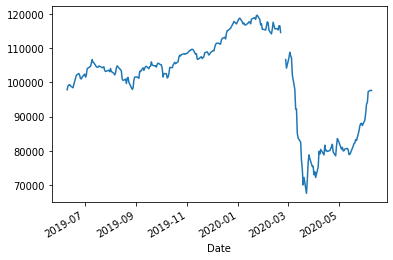

In [0]:
df.High.plot();

## Histograma

Quando se quer ter uma noção de quantas vezes uma determinada informação aparece no conjunto de dados, plotar o histograma pode ser de grande valor.

Histogramas são uma das principais ferramentas da estatística para extrair informações sobre frequencia e distribuição dos nossos dados. Ele é conceitualmente bem simples. Se você nunca teve contato com esse tipo de gráfico, recomendo assistir a [este vídeo da Khan Academy](https://www.youtube.com/watch?v=L0f8d3B8dk4).

Vamos plotar o histograma do volume movimentado para as ações do BBAS3.

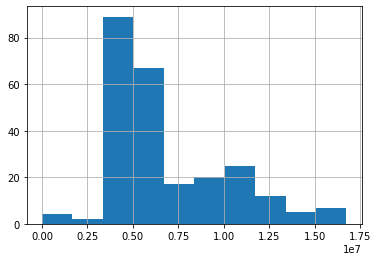

In [0]:
# plotar histograma do volume
df.Volume.hist();

## Gráfico de Dispersão (*Scatter Plot*)

O gráfico de dispersão é um gráfico ideal para ver a correlação entre duas variáveis quaisquer.

Serve não apenas para mostrar quanto uma variável é afetada por outra, mas também para plotar coordenadas geográficas para ter um *awareness* (como foi feito no projeto do Módulo 1).

Como não faz sentido com os dados do Ibov, vou trabalhar com outro *dataset*. Vamos usar dados de consumo de cerveja em uma região universitária da cidade de São Paulo.

Para mais informações sobre os dados, acesse [este link](https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo).

In [10]:
# importar dados de consumo de cerveja
df_cerveja = pd.read_csv("https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/consumo_cerj.csv")
# ver as 5 primeiras entradas
df_cerveja.head()

,data,media,minima,maxima,precipitacao,fds,consumo
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


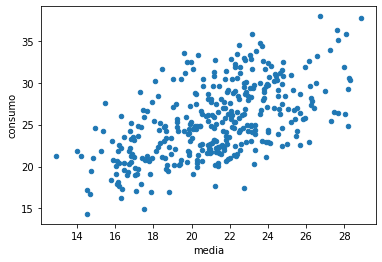

In [11]:
# plotar um gráfico de dispersão
df_cerveja.plot.scatter('media', 'consumo')

*Os dados usados acima não são os originais, sofreram um processo rápido de limpeza. Caso você queira veer como foi feito, acesse a célula de código abaixo.*

In [0]:
#@title
# importar dados original de consumo de cerveja 
df_cerveja_original = pd.read_csv("https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/consumo_cerveja_original.csv")
df_cerveja_original.dropna(inplace=True)

# trocar nomes das colunas
df_cerveja_original.columns= ['data', 'media', 'minima', 'maxima','precipitacao', 'fds', 'consumo']

df_cerveja_original.media = df_cerveja_original.media.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.minima = df_cerveja_original.minima.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.maxima = df_cerveja_original.maxima.apply(lambda x: float(x.replace(",", ".")))
df_cerveja_original.precipitacao = df_cerveja_original.precipitacao.apply(lambda x: float(x.replace(",", ".")))

# exportar para csv
df_cerveja_original.to_csv('consumo_cerveja.csv', index=False)

## Boxplot

Boxplot é um dos tipos de gráficos que conseguem fornecer o maior número de informações estatísticas de uma vez só.

<center><img src="https://pro.arcgis.com/en/pro-app/help/analysis/geoprocessing/charts/GUID-0E2C3730-C535-40CD-8152-80D794A996A7-web.png" height="200px"></center>

É possível ter em uma imagem os valores máximos, mínimos, quartis e mediana. *Outliers* também são representados como pontos acima do valor máximo ou abaixo do valor mínimo

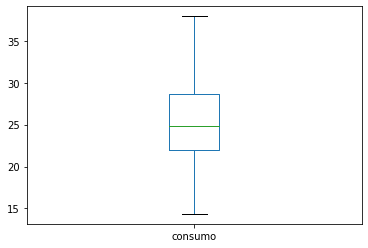

In [13]:
# plotar o boxplot para os valores máximos de consumo de cerveja
df_cerveja.consumo.plot(kind="box")

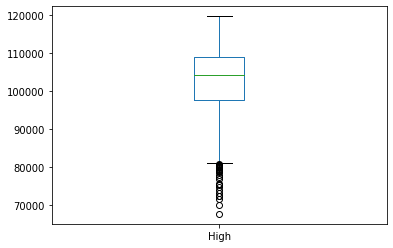

In [14]:
# plotar o boxplot para os valores máximos da ação
df.High.plot(kind="box")